<a href="https://colab.research.google.com/github/evanrjiang/NGG6050/blob/main/Jiang_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.api as sm

Text(0, 0.5, 'Wing Length')

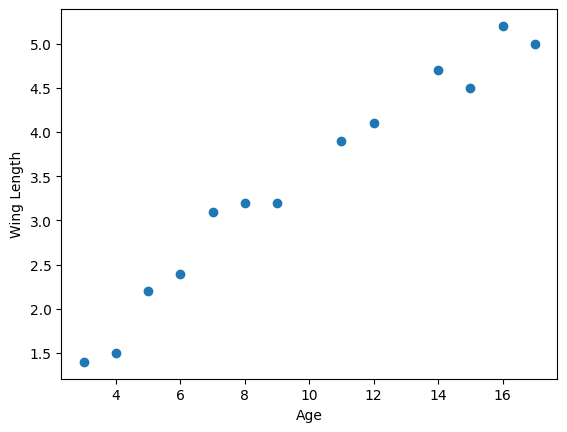

In [2]:
# 1.
age = np.array([3,4,5,6,7,8,9,11,12,14,15,16,17])
wingLength = np.array([1.4,1.5,2.2,2.4,3.1,3.2,3.2,3.9,4.1,4.7,4.5,5.2,5.0])

plt.scatter(age,wingLength)
plt.xlabel('Age')
plt.ylabel('Wing Length')

Text(0, 0.5, 'Wing Length')

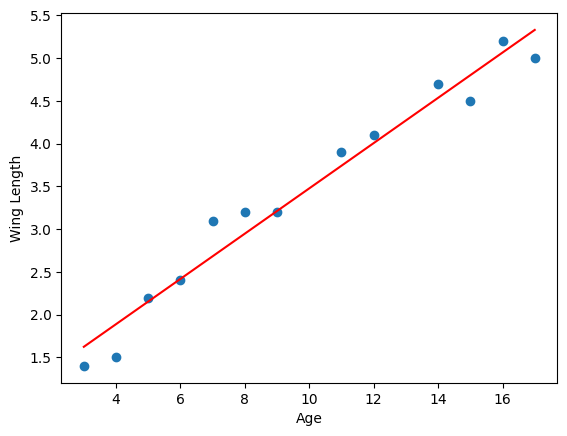

In [8]:
# 2.
b = (np.sum(age*wingLength)-(np.sum(age)*np.sum(wingLength)/len(age)))/(np.sum(age**2)-(np.sum(age)**2/len(age)))
a = np.mean(wingLength)-b*np.mean(age)

y = b*age + a
plt.plot(age,y, color = 'red')
plt.scatter(age,wingLength)
plt.xlabel('Age')
plt.ylabel('Wing Length')

In [10]:
# 3.
meanWing = np.mean(wingLength)

SSR = np.sum((y-meanWing)**2)
SSE = np.sum((wingLength-y)**2)

df_regression = 1
df_residual = len(age)-2

MSR = SSR/df_regression
MSE = SSE/df_residual
fstat = MSR/MSE

p_value = st.f.sf(fstat,df_regression,df_residual)
print(f'p = {p_value}')

p = 3.0097431724571217e-09


The 95% confidence interval for b is 0.23043927955854387 to 0.2989289617618878


Text(0, 0.5, 'Wing Length')

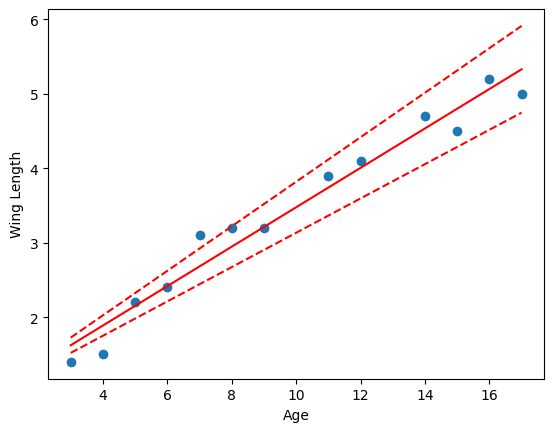

In [13]:
alpha = 0.05
t_stat = st.t.ppf(1-alpha/2, df_residual)
SE_b = np.sqrt(MSE/np.sum((age-np.mean(age))**2))

bUpper = b + t_stat*SE_b
bLower = b - t_stat*SE_b

print(f'The 95% confidence interval for b is {bLower} to {bUpper}')

yUpper = bUpper*age + a
yLower = bLower*age + a
plt.plot(age,y, color = 'red')
plt.plot(age,yUpper,color = 'red',linestyle = '--')
plt.plot(age,yLower,color = 'red',linestyle = '--')
plt.scatter(age,wingLength)
plt.xlabel('Age')
plt.ylabel('Wing Length')

In [14]:
# 5.
SST = np.sum((wingLength-meanWing)**2)
r_squared = 1 - SSE/SST
print(f'R^2 = {r_squared}')

R^2 = 0.9633822518042856


In [15]:
# 6.
corr_matrix = np.corrcoef(age,wingLength)
print(f'r = {corr_matrix[0,1]:.4f}')

r = 0.9815


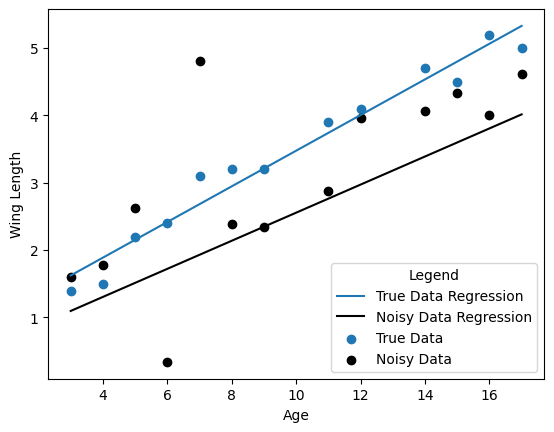

In [22]:
#7.
noise_mean = 0  # Mean of the noise
noise_std_dev = 1  # Standard deviation of the noise
noise = np.random.normal(noise_mean, noise_std_dev, size=len(wingLength))  # Generate noise
wingNoise = wingLength + noise  # Add noise to the true values
b_noise = (np.sum(age*wingNoise)-(np.sum(age)*np.sum(wingNoise)/len(age)))/(np.sum(age**2)-(np.sum(age)**2/len(age)))
a_noise = np.mean(wingNoise)-b*np.mean(age)

y_noise = b_noise*age + a_noise
plt.plot(age,y,label='True Data Regression')
plt.plot(age,y_noise,label='Noisy Data Regression' ,color = 'black')
plt.scatter(age,wingLength,label='True Data')
plt.scatter(age,wingNoise,label='Noisy Data',color = 'black')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.legend(title='Legend', loc='lower right')